# Coding Exercise #3 *Laser amplifier with saturation*

In this exercise, you will simulate the growth of the intensity of a laser beam propagating through a laser amplifier in the presence of gain saturation.

In the lectures, we saw that a laser beam passing through a pumped amplifying medium (amplifier) does not experience unbounded exponential growth.

As the beam becomes more intense, it decreases the population inversion through stimulated emission and the hence the gain is reduced.

The fact that the gain experienced by the beam depends on the beam intensity and the intensity depends on the gain, we end up with the following nonlinear differential equation


## $\frac{dI\left(z\right)}{dz}=\gamma\left(I\left(z\right)\right)I\left(z\right)$

Here, the beam is propagating in the $z$ direction and $I\left(z\right)$, $\gamma\left(z\right)$ are the beam intensity and exponential gain coefficient at position $z$, respectively.

This differential equation cannot be solved analytically in the general case.


## A note about units

Provided we are consistent, it doesn't matter which units we use for intensity. To keep things general, we will use arbitray units.

## Simulation Tasks


**a)** A laser amplifier of length $L=10$ cm has a small signal gain coefficient of $\gamma_0 = 1$ /cm (at a certain level of pumping) and a saturation intensity $I_{sat}=100$ (arb. units) 

A beam of $I_{in}=1$ is applied to the input of the amplifier. 

Use `odeint` from `scipy.integrate` to solve the differential equation above.

i) Using a log vertical scale, plot $I(z)$ and the $I_{unsat}(z)$ as a function of $z$ in the amplifier, where $I_{unsat}(z) = I_{in}\exp(\gamma_0 z)$ represents the intensity growth of the beam in the absence of saturation.

 

In [14]:
from scipy.integrate import odeint
import numpy as np

def gamma(I, gamma_0, I_sat):
    return gamma_0/(1 + (I/I_sat))

def dIdz(I, z, gamma_0, I_sat):
    return gamma(I, gamma_0, I_sat)*I

L = 10 #(cm)
gamma_0 = 1 #(/cm)
I_sat = 100
I_in = 1

In [15]:
z = np.arange(0, 10, 0.1)

I = odeint(dIdz, I_in, z, args=(gamma_0, I_sat))

In [16]:
def I_unsat(z, I_in, gamma_0):
    return I_in*np.exp(gamma_0*z)

Text(0, 0.5, 'Intensity')

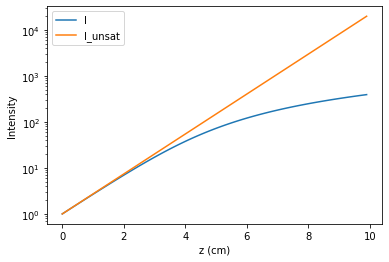

In [17]:
import matplotlib.pyplot as plt

plt.plot(z, I, label='I')
plt.plot(z, I_unsat(z, I_in, gamma_0), label='I_unsat')
plt.legend()
plt.yscale('log')
plt.xlabel('z (cm)')
plt.ylabel('Intensity')

ii) Plot $\gamma$ and $\gamma_0$ as a function of z in the amplifier.

Text(0, 0.5, 'gamma')

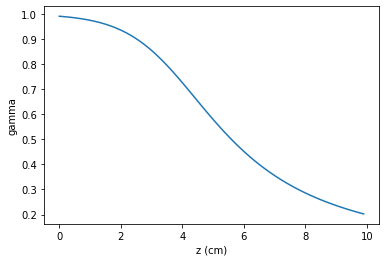

In [5]:
# Can't find the equation for gamma_0 in the notes

plt.plot(z, gamma(I, gamma_0, I_sat))
plt.xlabel('z (cm)')
plt.ylabel('gamma')

ii) Calculate the intensity at the output of the amplifier $I_{out}$; and the saturated, $G$,  and unsaturated gain, $G_0$.

In [6]:
# I_out = I(z=L)

z = np.arange(0, 10.1, 0.1)
I = odeint(dIdz, I_in, z, args=(gamma_0, I_sat))

#print(z[-1])
I_out = I[-1]
print('I_out = {}'.format(I_out[0]))

I_out = 401.4833811776435


In [7]:
G = I_out[0]/I_in
G_0 = np.exp(gamma_0*L)

print('G = {}'.format(G))
print('G_0 = {}'.format(G_0))

G = 401.4833811776435
G_0 = 22026.465794806718


iii) Check your answer for $I_{out}$ using the appropriate formula from Lecture 4.6.1

In [8]:
I_out_2 = (G/(G-1))*np.log(G_0/G)*I_sat

print('I_out = {}'.format(I_out_2))

I_out = 401.48338594250356


### Extension

**b)** How does the output intensity vary with input intensity over a large range of input intensties (from $I_{in}\ll I_{sat}$ to $I_{in}\gg I_{sat}$)? Think carefully about the behaviour at the extremes. Plot a sketch by hand to record your predictions.

In [ ]:
# For I_in << I_sat, (1/(1-G))*np.log(G_0/G) << 1 
# Therefore gain is large so I_out is large?

# For I_in >> I_sat, gain coefficient is small so I_out is approximately the same as I_in

**c)** Now carry out a simulation to test your prediction. Make a log-log plot of $I_{out}$ vs $I_{in}$ for $I_{in}$ in the range 1e-3 to 1e-5 (use `np.logspace`) for $\gamma_0=0.5$ /cm and $I_{sat}=100$. On the same axes, plot the extreme cases you thought about in the previous part. Were your predictions correct? If not, use the simulations to improve your understanding.

In [9]:
I_in_array = np.logspace(-3, -5, 100)

#print(I_in_array)

z = np.arange(0, 10.1, 0.1)
gamma_0 = 0.5
I_sat = 100

I_out_array = []
for i in range(len(I_in_array)):
    I = odeint(dIdz, I_in_array[i], z, args=(gamma_0, I_sat))
    I_out_array.append(I[-1])

In [10]:
# For I_in << I_sat
I_in_small = 10**(-5) # Same as start of plot above
I = odeint(dIdz, I_in_small, z, args=(gamma_0, I_sat))
I_out_small = I[-1]

# For I_in >> I_sat
I_in_large = 10000
I = odeint(dIdz, I_in_large, z, args=(gamma_0, I_sat))
I_out_large = I[-1]

Text(0, 0.5, 'I_out')

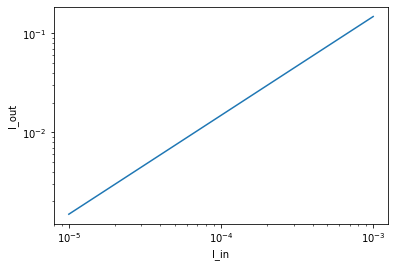

In [11]:
plt.plot(I_in_array, I_out_array)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I_in')
plt.ylabel('I_out')

#plt.plot(I_in_large, I_out_large, color='red')
# Can't plot this as it is so far off the scale

In [ ]:
# As I_in increases, I_out also increases but this plot only shows I_in << I_sat

Text(0, 0.5, 'I_out')

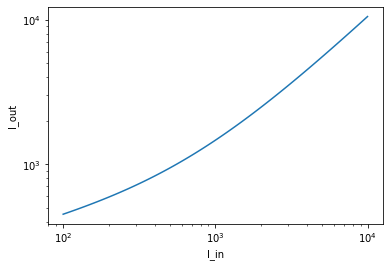

In [12]:
# For I_in >> I_sat, 

I_in_array = np.logspace(2, 4, 100)

z = np.arange(0, 10.1, 0.1)
gamma_0 = 0.5
I_sat = 100

I_out_array = []
for i in range(len(I_in_array)):
    I = odeint(dIdz, I_in_array[i], z, args=(gamma_0, I_sat))
    I_out_array.append(I[-1])
    
plt.plot(I_in_array, I_out_array)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I_in')
plt.ylabel('I_out')

# Still increasing for larger I_in? This doesn't seem right